Note: If you are using the Google Colab and want to use tensorflow < 2: you will have to downgrade using this link. https://colab.research.google.com/notebooks/tensorflow_version.ipynb

# Sentiment Analysis on IMDB Movie Review dataset

Sentiment analysis is one of the key areas of research in NLP and Sequence modelling. We will be using LSTMs and Bi-directional LSTMs to predict two classes - positive or negative sentiment.


You will be reading the dataset from here: https://drive.google.com/file/d/127PCwycL0oToSF6l-c2oFuBkacYsmlgK/view?usp=sharing

You can use this blog for understanding: https://towardsdatascience.com/word-embeddings-for-sentiment-analysis-65f42ea5d26e

In [ ]:
import numpy as np 
import pandas as pd 
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Conv1D, Dropout, Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
path='/content/drive/My Drive/Deep learning/DLAS6/IMDB Dataset.csv'

All the relevant libraries are imported. 
You are free to change as you please. 
Using the GPU backend is recommended as LSTMs are computationally expensive to train.





1.   You are expected to read the dataset into a dataframe.
2.   This is a real world dataset and you will be expected to clean the dataset.

1.   This includes removing trailing spaces and HTML tags.






In [5]:
df = pd.read_csv(path)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Data Cleaning 

In [6]:
df['review']=df['review'].str.replace('<HTML TAG/>', '').str.replace('<br />', '')
df=df.truncate()
print(df.iloc[500][0])
print()
print(df.iloc[2202][0])
print()
print(df.iloc[7921][0])

What an empty and lack lustre rendition of the classic novel. I do wish people would stop messing about with classics when they clearly have no idea of the real intention or point of the original. This version is no different. I felt that the Ralph Fiennes version is much worse though as the casting of Juliette brioche as Kathy has got to be the worst casting decision EVER...anyway back to this version. It aims to make the story relevant to a contemporary setting and in a musical style. It succeeds in both but high art it is nit. Throwaway viewing for a rainy day maybe...The direction was average and the editing abysmal. Worse than the old Quincy. Deepak Verma does a great turn as Hindley and is in fact one of Britains wasted talents. The part of Heath was played with great charm and belief and I think that the casting is the strongest point of this project. Although a more talented director would have made better use of the facilities he had. Its clear that he was a director for hire 

Techniques used to clean the data:

- The replace function of pandas to remove html and br tags. 
- The truncate function to remove any trailing spaces.
- Above I have printed 3 random reviews and all of them are cleaned

### Data Exploration


We will use NLTK for data exploration


![alt text](https://getthematic.com/wp-content/uploads/2018/03/Harris-Word-Cloud-e1522406279125.png)




In [7]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import itertools
nltk.download('punkt')
nltk.download('stopwords')
word_list=df['review'].apply(word_tokenize)
tokencount = len(np.unique(list(itertools.chain(*[word for word in word_list if word not in stopwords.words('english')]))))
print ("Distinct token count is: {}".format(tokencount))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Distinct token count is: 237550


In [ ]:
maxlen=max([len(review)for review in word_list])
minlen=min([len(review)for review in word_list])

### Model processing

You can use a 70:30 train/test split.
The labels are 'positive' and negative, you should assign them integers 0 or 1 for further processing.

In [ ]:
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

### Tokenizer
You will need to use fit a tokenizer over your training and testing data.

What does a tokenizer do?
It creates a dictionary of word to integer mappings. It updates internal vocabulary based on a list of texts. You should read up on the documentation before diving into the code. 

You will also be using the the text_to_sequence function will return integers based on a respective tokenizer.

Make sure you **pad** your sequences to max length using sequence.pad_sequences()




In [ ]:
tokenizer = Tokenizer(num_words=tokencount)
# x_train
tokenizer.fit_on_texts(df['review'])
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(df['review'])
train_padded = sequence.pad_sequences(train_sequences,maxlen=maxlen)
# # x_test
# test_sequences = tokenizer.texts_to_sequences(df['sentiment'])
# test_padded = sequence.pad_sequences(test_sequences,maxlen=1)

In [11]:
y_new=df['sentiment'].str.get_dummies(" ")
y_new

,negative,positive
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
49995,0,1
49996,1,0
49997,1,0
49998,1,0


In [12]:
df['sentiment']=df['sentiment'].replace("negative",1)
df['sentiment']=df['sentiment'].replace("positive",0)
df['sentiment']

0        0
1        0
2        0
3        1
4        0
        ..
49995    0
49996    1
49997    1
49998    1
49999    1
Name: sentiment, Length: 50000, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(train_padded,y_new,test_size=0.3)

### Embedding layer
You will be importing the embedding layer from Keras.
Embedding layers are common place when handling textual data. 
Word embeddings provide a dense representation of words and their relative meanings.

#### How do they work - via Stack Overflow
Link: https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work

The output vectors are not computed from the input using any mathematical operation. Instead, each input integer is used as the index to access a table that contains all posible vectors. That is the reason why you need to specify the size of the vocabulary as the first argument (so the table can be initialized).

The most common application of this layer is for text processing. Let's see a simple example. Our training set consists only of two phrases:

Hope to see you soon

Nice to see you again

So we can encode these phrases by assigning each word a unique integer number (by order of appearance in our training dataset for example). Then our phrases could be rewritten as:

[0, 1, 2, 3, 4]

[5, 1, 2, 3, 6]

Now imagine we want to train a network whose first layer is an embeding layer. In this case, we should initialize it as follows:

Embedding(7, 2, input_length=5)

The first argument (7) is the number of distinct words in the training set. The second argument (2) indicates the size of the embedding vectors. The input_length argumet, of course, determines the size of each input sequence.

Once the network has been trained, we can get the weights of the embedding layer, which in this case will be of size (7, 2) and can be thought as the table used to map integers to embedding vectors.


### Model Engineering

You will be required to engineer three types of models from scratch.

1.   Using LSTMs
2.   Bi-directional LSTMs

1.   A model with less than 10,000 parameters - the lower the parameters, higher the score (provided accuracy is good)


For each model:

1.   You will be reporting graphs for validation accuracy and training loss.
2.   What hyper-parameters, loss functions, optimizations, initializations were used. This should be clearly stated in your analysis.

~90 percent and above is the desired accuracy. 

For model 3, CLEARLY report the number of parameters.




In [ ]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [15]:
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape) 
print(y_test.shape)

(35000, 2730)
(35000,)
(15000, 2730)
(15000,)


In [ ]:
# CODE HERE
# Some example code to help you get started
# X_train is your training data 
# input_dim is your dictionary length, output_dim is the length is the dimension of the dense embedding, you can choose whatever works best for you, starting with 2.
model = Sequential()
model.add(Embedding(5000, 100, input_length=X_train.shape[1]))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs=5
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32*22,validation_data=(X_test,y_test))

# You can choose to complete this model per your choice

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 35000 samples, validate on 15000 samples
Epoch 1/5
35000/35000 [==============================] - 378s 11ms/step - loss: 0.5599 - accuracy: 0.7267 - val_loss: 0.3803 - val_accuracy: 0.8344
Epoch 2/5
35000/35000 [==============================] - 376s 11ms/step - loss: 0.3531 - accuracy: 0.8523 - val_loss: 0.3400 - val_accuracy: 0.8540
Epoch 3/5
35000/35000 [==============================] - 379s 11ms/step - loss: 0.3519 - accuracy: 0.8571 - val_loss: 0.3674 - val_accuracy: 0.8368
Epoch 4/5
35000/35000 [==============================] - 381s 11ms/step - loss: 0.3255 - accuracy: 0.8674 - val_loss: 0.3384 - val_accuracy: 0.8666
Epoch 5/5
35000/35000 [==============================] - 380s 11ms/step - loss: 0.3317 - accuracy: 0.8640 - val_loss: 0.3335 - val_accuracy: 0.8651


In [ ]:
history4 = model.fit(X_train, y_train, epochs=15, batch_size=32*22,validation_data=(X_test,y_test),initial_epoch=5,use_multiprocessing=True)

Train on 35000 samples, validate on 15000 samples
Epoch 6/15
35000/35000 [==============================] - 381s 11ms/step - loss: 0.2870 - accuracy: 0.8850 - val_loss: 0.3449 - val_accuracy: 0.8507
Epoch 7/15
35000/35000 [==============================] - 380s 11ms/step - loss: 0.2692 - accuracy: 0.8948 - val_loss: 0.3318 - val_accuracy: 0.8610
Epoch 8/15
35000/35000 [==============================] - 380s 11ms/step - loss: 0.2564 - accuracy: 0.9003 - val_loss: 0.3458 - val_accuracy: 0.8519
Epoch 9/15
35000/35000 [==============================] - 383s 11ms/step - loss: 0.2548 - accuracy: 0.8997 - val_loss: 0.3479 - val_accuracy: 0.8566
Epoch 10/15
35000/35000 [==============================] - 382s 11ms/step - loss: 0.2581 - accuracy: 0.8965 - val_loss: 0.3656 - val_accuracy: 0.8492
Epoch 11/15
35000/35000 [==============================] - 383s 11ms/step - loss: 0.2706 - accuracy: 0.8955 - val_loss: 0.3882 - val_accuracy: 0.8283
Epoch 12/15
35000/35000 [=============================

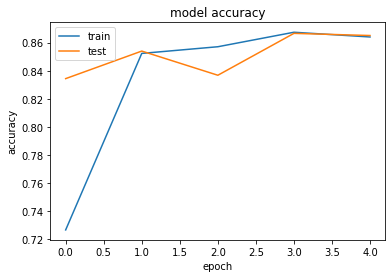

In [ ]:
plot_accuracy(history)

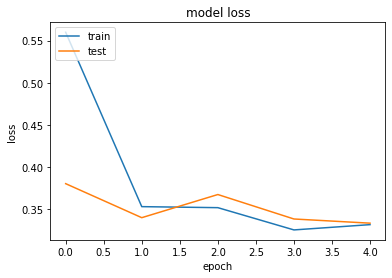

In [ ]:
plot_loss(history)

In [24]:
from keras.layers import SpatialDropout1D
model = Sequential()
model.add( Embedding(5000,196, input_length = X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add( Bidirectional( LSTM(120, dropout = 0.2, recurrent_dropout = 0.2,)))
model.add( Dense(2, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
history_model2 = model.fit(X_train, y_train, epochs=3, batch_size=32*8,validation_data=(X_test,y_test))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 2730, 196)         980000    
_________________________________________________________________
spatial_dropout1d_8 (Spatial (None, 2730, 196)         0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 240)               304320    
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 482       
Total params: 1,284,802
Trainable params: 1,284,802
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 35000 samples, validate on 15000 samples
Epoch 1/3
35000/35000 [==============================] - 2136s 61ms/step - loss: 0.4620 - accuracy: 0.7766 - val_loss: 0.4464 - val_accuracy: 0.7984
Epoch 2/3
35000/35000 [==============================] - 2136s 61ms/step - loss: 0.3607 - accuracy: 0.8431 - val_loss: 0.4465 - val_accuracy: 0.7936
Epoch 3/3
35000/35000 [==============================] - 2133s 61ms/step - loss: 0.3180 - accuracy: 0.8689 - val_loss: 0.3743 - val_accuracy: 0.8327


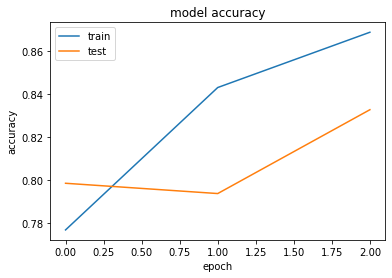

In [25]:
plot_accuracy(history_model2)

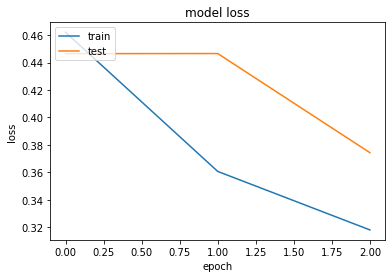

In [26]:
plot_loss(history_model2)

In [41]:
model3 = Sequential()
model3.add(Embedding(450, 15, input_length=X_train.shape[1]))
model3.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2))
model3.add(Dense(2, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()
history = model3.fit(X_train, y_train, epochs=3, batch_size=32*22,validation_data=(X_test,y_test))


# You can choose to complete this model per your choice

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 2730, 15)          6750      
_________________________________________________________________
lstm_20 (LSTM)               (None, 20)                2880      
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 42        
Total params: 9,672
Trainable params: 9,672
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 35000 samples, validate on 15000 samples
Epoch 1/3
35000/35000 [==============================] - 395s 11ms/step - loss: 0.6852 - accuracy: 0.5891 - val_loss: 0.6570 - val_accuracy: 0.6631
Epoch 2/3
35000/35000 [==============================] - 394s 11ms/step - loss: 0.5774 - accuracy: 0.7199 - val_loss: 0.5108 - val_accuracy: 0.7597
Epoch 3/3
35000/35000 [==============================] - 386s 11ms/step - loss: 0.5075 - accuracy: 0.7603 - val_loss: 0.4861 - val_accuracy: 0.7719


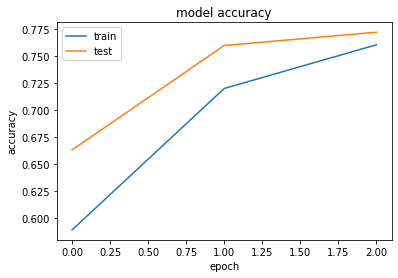

In [42]:
plot_accuracy(history)

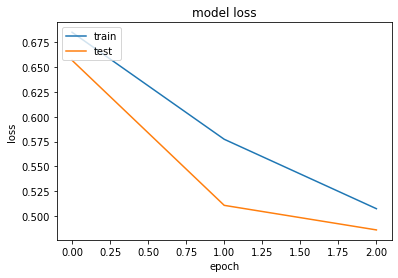

In [43]:
plot_loss(history)

### Model Predictions. For your best performing model

Come up with ten sample sentences NOT part of the original data set. 
Use model.predict() to generate predictions and report positive or negative sentiment.

Testing for LSTM model

In [ ]:
#This testing is for LSTM model
# This is my best model
texts=["I am a bad boy","This movie was really bad","I dont like to hit people","Deep learning is cool","I would hit you with a bat"]
lstm_sequences = tokenizer.texts_to_sequences(texts)
lstm_padded = sequence.pad_sequences(lstm_sequences,maxlen=maxlen)
results=model.predict(lstm_padded)
labels=["Positive","Negative"]
for x in range(5):
  negative=1
  if results[x][0]<0.5:
    negative=0
  print("{} is: {}".format(texts[x],labels[negative]))
  

I am a bad boy is: Negative
This movie was really bad is: Negative
I dont like to hit people is: Positive
Deep learning is cool is: Positive
I would hit you with a bat is: Negative
